# Introduction
As the discourse around climate change gains momentum, one key factor causing concern has been temperature increases. Sources have reported that even a minor temperature increase could be disastrous for the planet [(Sky News, 2015)](https://www.youtube.com/watch?v=9GjrS8QbHmY). However, what is the current state of temperature increases?  

In this project, the [data](https://www.fao.org/faostat/en/#data/ET) from Food and Agriculture Organisation of the UN, covering approx. 60 years and 247 countries will be examined to understand how the temperatures have increased. 


As the project will reveal, since the mid 1970s, the average global temperatures have increased, leading to an approx. 1.5 degree increase in overall temperature in 2020 compared to the 1970s. However the increases are not uniform for every country. For some of the world’s richest nations, the G7, the impact was also experienced from around the mid-1990s, perhaps shedding light regarding the greater discourse around climate change from the era onwards.


In contrast South American countries, experienced year on year temperature increases earlier than the G7, alluding to the discourse concerning some climate change impacting poorer countries more greatly than weather countries.

# Overview
The dataset will be pre-processed. For further details on this and the reasonings made 
regarding the dataset, please refer to the appendix.  Subsequently, the dataset consists of the following fields. 


In [3]:
# for data handling
import numpy as np 
import pandas as pd

# for static graphs
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# for interactive graphs
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

# As some platforms do not support interactive graphs, in such cases static and interactive versions have been provided. 
#Kaggle only
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
temp = pd.read_csv("/kaggle/input/z-unlocked-challenge-1-data-visualization/temperature_change_data_11-29-2021.csv")
temp.head()

In [3]:
# Clean data - exclude unnecessary data and make minor alterations for improved readability
temp.drop(temp[temp["Value"].isnull()].index, axis = 0, inplace = True)

temp = temp[temp["Months"]=="Meteorological year"]
x = ["Area Code (ISO3)", "Domain Code","Domain","Element Code","Months Code","Year Code", "Months", "Flag Description", "Flag"]
temp.drop( x, inplace = True, axis =1)
temp.rename(columns = {"Area": "Country"}, inplace = True)

In [4]:
#Transforming the dataset for use later in the project
df_group = temp.groupby(["Country", "Year"])["Value"].mean().reset_index()
temp.head()

Country             Element  Year Unit  Value
240  Afghanistan  Temperature change  1961   °C -0.121
241  Afghanistan  Temperature change  1962   °C -0.171
242  Afghanistan  Temperature change  1963   °C  0.841
243  Afghanistan  Temperature change  1964   °C -0.779
244  Afghanistan  Temperature change  1965   °C -0.254

# Global temperature fluctuations
The average global temperature fluctuations highlighted in the dataset are visualised below. As the graph shows, since 1970, the global temperatures have shown a year on year increase. There are some fluctuations and decreases in the temperature. However such decreases do not appear to be significant to the extent of reverting the overall trend or lowering the temperature to pre-1976 levels.

In [ ]:
#Restructure data for visualisation
Global = temp.groupby("Year")["Value"].mean().reset_index()

#Construct visualisation 
fig = px.line(Global, x="Year", y = "Value", markers=True,  title = "Global temperature fluctuation between 1961 to 2020 (interactive)")

#Customisation
fig.add_hline(0, line_width = 1, line_dash = "dot")

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.add_annotation(
    text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow=False, x = 0, y = -0.15
    , xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5
    , font=dict(size=10, color="grey"), align="left")

fig.show()

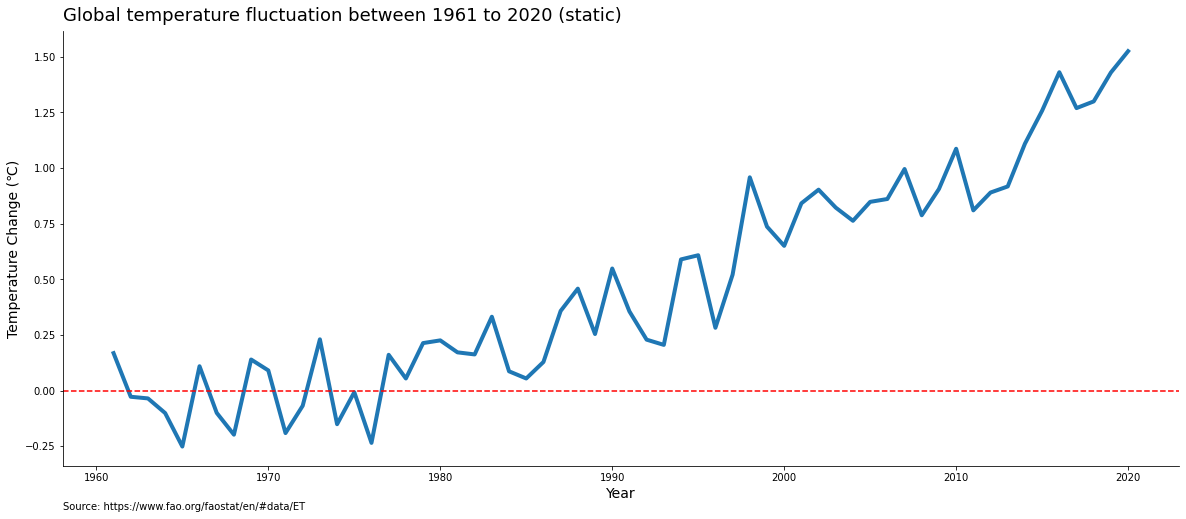

In [6]:
#Construct visualisation 
plt.figure(figsize=(20,8))
sns.lineplot(x = "Year",  y = "Value", data = Global, lw = 4)

#Customisation
plt.axhline(0, ls = "--", color = "red")
plt.title("Global temperature fluctuation between 1961 to 2020 (static)", fontsize = 18, loc='left', y = 1.01)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)

This is further emphasised by converting the line chart to a bar chart, whose height shows the extent of the temperature fluctuation. Until 1977, there were major temperature drops. However since 1977, although the scale has changed, the overall trend is an increase in temperatures.

In [7]:
#Construct visualisation 
fig = px.bar(Global, x = "Year", y = "Value", title = "Global temperature fluctuation between 1961 to 2020 (interactive)")

#Customisation
fig.add_vline(1977, line_width = 1, line_dash = "dot")
fig.add_vrect(x0=1960, x1=1977, fillcolor = "grey", opacity=0.3 )

fig.update_layout({"plot_bgcolor": "rgba(0,0,0,0)", "paper_bgcolor": "rgba(0,0,0,0)"})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow= False, x= 0, y =-.15, 
                  xref = "paper", yref = "paper", xanchor="left", yanchor="bottom", xshift=-1, yshift=-5,
                  font=dict(size = 10, color = "grey"), 
                  align = "left")



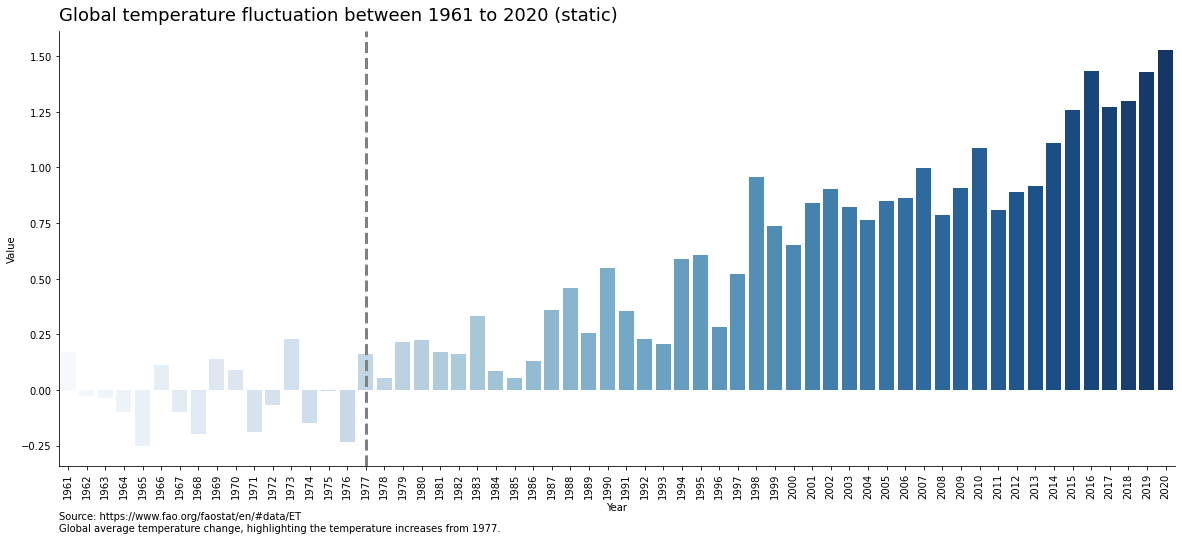

In [8]:
#Construct visualisation 
plt.figure(figsize=(20,8))
fig = sns.barplot(x ="Year", y = "Value", data = Global, palette = "Blues")

#Customisation
plt.axvline(16, ls = "--", color = "grey", lw= 3)
fig.tick_params(axis='x', rotation=90)
plt.title("Global temperature fluctuation between 1961 to 2020 (static)", fontsize = 18, loc='left',   y = 1.01)

plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET \nGlobal average temperature change, highlighting the temperature increases from 1977. ', (0,-.15), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)

As the appendix highlights there are some outliers in the data. Consequently, some could argue that this trend is not accurate. However the consistent increases undermine this argument.

In addition, on a global level, the distribution of the data highlights that the mean and standard deviation is above 0 further emphasising the trends identified in previous graphs.

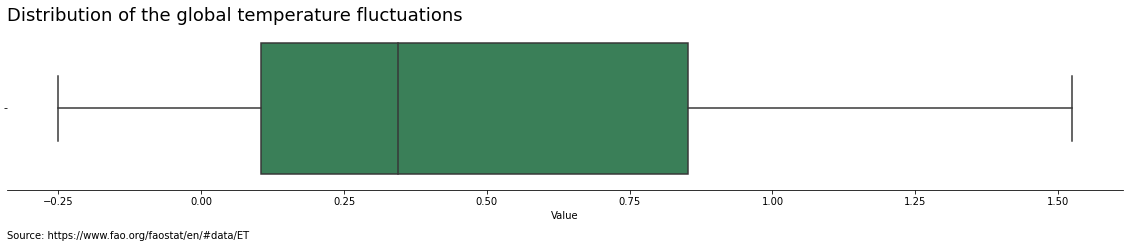

In [9]:
#Construct visualisation 
plt.figure(figsize=(20,3))
sns.boxplot( x = "Value", data =Global, color = "seagreen")

#Customisation
plt.title("Distribution of the global temperature fluctuations", fontsize = 18,loc='left',  y = 1.01)
plt.title("Distribution of the global temperature fluctuations", fontsize = 18,loc='left')
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.3), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = True, bottom = False)

# Regional temperature fluctuations
The dataset can be explored further by investigating individual nations or groups of nations. As such, two groups of nations, G7 and South America and their temperature fluctuations from 1960 to 2020 will be examined.

The G7 nations have been selected due to their global dominance they hold. The hope is that by understanding how the temperatures fluctuate for these nations, it may allude to the debate and actions taken with regards to climate change.

South America, on the other hand, has been selected as a juxtaposition to the G7. The hope is to understand whether location and economic differences are impacting temperature fluctuations.
Please note, in the appendix there is an interactive graph for all nations for those wishing to examine a country/countries that are not covered in this project. Furthermore the static equivalent illustrates that whilst there are some fluctuations, from around the 1990s to the 2000s, every nation has been a temperature increase of above 0.

## G7
As the information from the [UK government](https://www.g7uk.org/what-is-the-g7/) highlights, the list of G7 nations are as follows:
* UK,
* USA,
* Canada,
* Japan,
* Germany,
* France,
* Italy,
* EU

As the EU is a collection of nations and some key member nations are also separately in the G7, they have not been included in this graph.

This dataset uses “United Kingdom of Great Britain and Northern Ireland” and “United States of America” to represent the UK and US respectively and for readability have been amended to UK and US.

In [10]:
#Restructure data for visualisation
df_group["Country"].replace("United Kingdom of Great Britain and Northern Ireland", "UK", inplace= True)
df_group["Country"].replace("United States of America", "USA", inplace= True)

g7_countries = ( "UK", "USA", "Canada", "Japan", "Germany", "France", "Italy")

g7 = df_group[df_group['Country'].isin(g7_countries)]
G7Overview = g7.groupby("Year")["Value"].mean().reset_index()

The G7 data indicates that the average temperature is as follows. The point at which the temperature is consistently above 0 is in the 1990. Therefore significantly later than the global trend.

In [11]:
#Construct visualisation 
fig =px.line(G7Overview, x="Year", y= "Value", title = "Temperature fluctuations for the G7 nations between 1961 to 2020 (interactive)" )

#Customisation
fig.add_hline(0, line_width = 2, line_dash = "dot")
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET")
    , showarrow = False, x = 0, y = -0.18, xref = "paper", yref = "paper", xanchor = "left", yanchor = "bottom",
    xshift =-1, yshift =-5, font=dict(size=10, color = "grey"), align = "left")
fig.show()

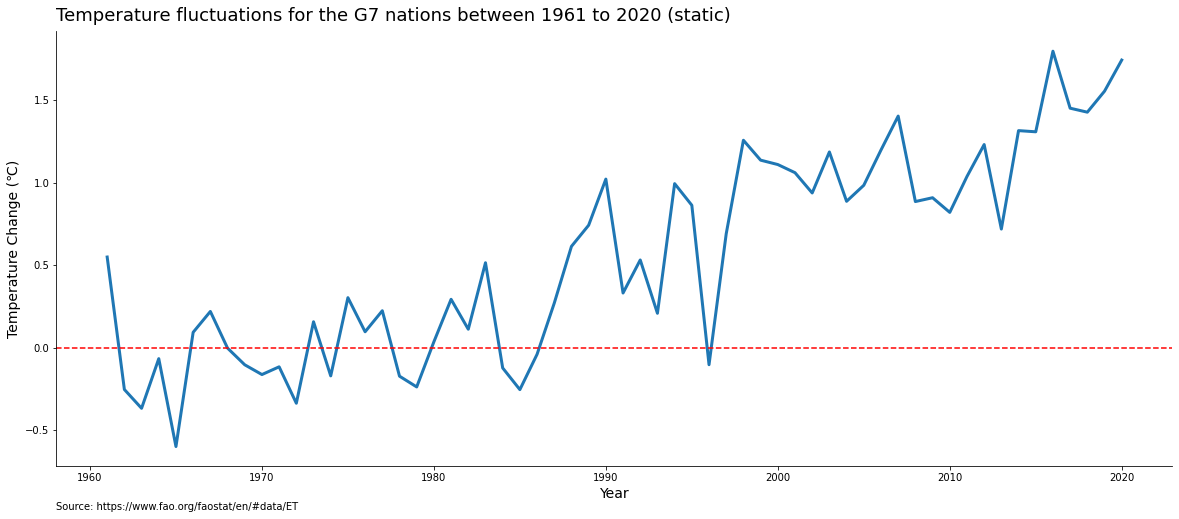

In [12]:
#Construct visualisation 
plt.figure(figsize=(20,8))
sns.lineplot( x="Year", y= "Value", data = G7Overview, lw = 3)

#Customisation
plt.axhline(0, ls = "--", color = "red")

plt.title("Temperature fluctuations for the G7 nations between 1961 to 2020 (static)", fontsize = 18, loc='left', y = 1.01)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )

plt.show()

Breaking down the data further, reveals the following temperature fluctuations for each of the G7 nations. It shows that by the late 1980s to early 1990s, the majority of the nations began to record temperature increases. However, 1996 appears to have been a particular cold year with all nations recording significant temperature drops. Furthermore, as late as 2010, the UK recorded a significant temperature decrease. These may be some factors relating to the scepticism voiced in relation to climate change.


In [13]:
#Construct visualisation 
fig = px.line(g7, x="Year", y = "Value", color = "Country", title = "Temperature fluctuations for individual G7 nations between 1961 to 2020")

#Customisation
fig.add_hline(0, line_width = 2, line_dash = "dot")

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow=False, x = 0, y = -0.15,
    xref='paper', yref='paper', xanchor='left', yanchor='bottom', xshift=-1, yshift=-5,
    font=dict(size=10, color="grey"), align="left")
fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow= False, x= 0, y =-.15, 
                  xref = "paper", yref = "paper", xanchor="left", yanchor="bottom", xshift=-1, yshift=-5,
                  font=dict(size = 10, color = "grey"), 
                  align = "left")

fig.show()

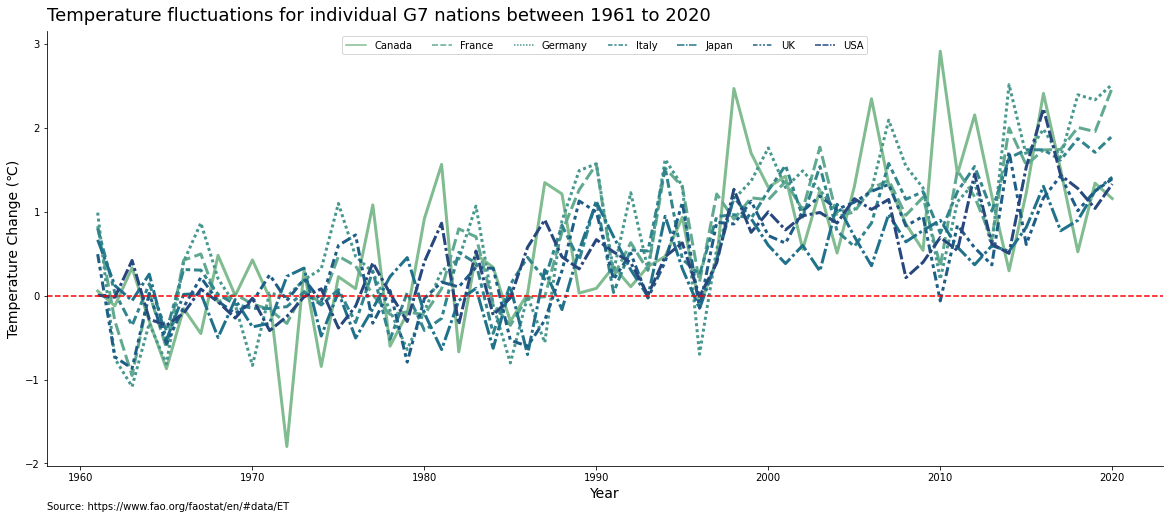

In [14]:
#Construct visualisation 
plt.figure(figsize = (20,8))
sns.lineplot(x="Year", y = "Value", hue = "Country", data = g7, lw = 3, style = "Country", palette = "crest")

#Customisation
plt.axhline(0, ls = "--", color = "red")

plt.title("Temperature fluctuations for individual G7 nations between 1961 to 2020", fontsize = 18, loc='left', y = 1.01)
plt.legend(title = "Country", bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc="upper center", ncol = len(g7["Country"]) )

plt.show()

Moreover, neighbouring nations do not necessarily have the same temperature fluctuations. For instance, Canada appears to have some major temperature fluctuations. Examining this against the US, its neighbour, shows that they do not follow a similar trend. This indicates that perhaps there are other factors which impact a nation’s temperature. For example, latitude may impact temperature fluctuations.

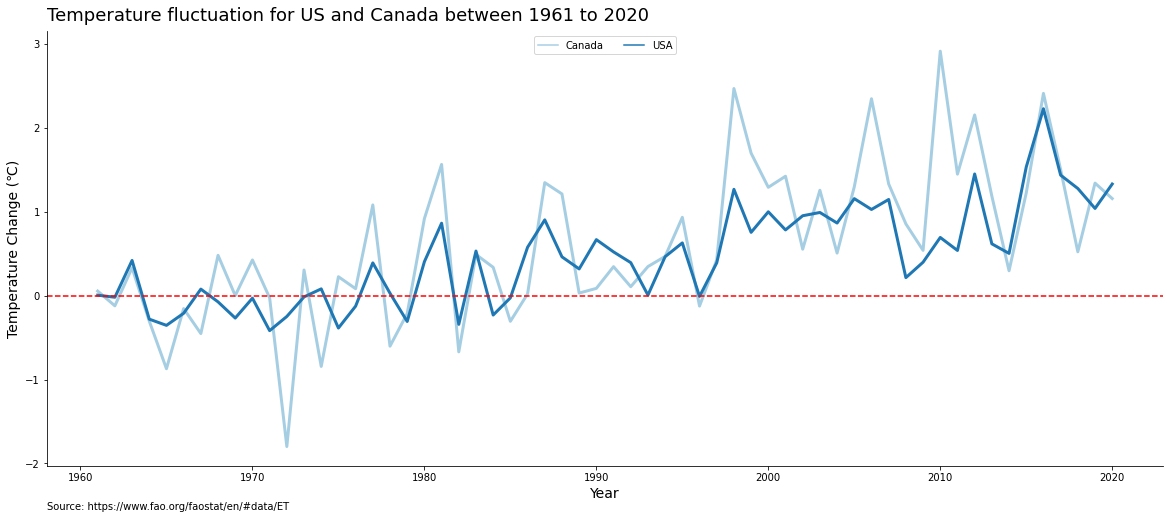

In [15]:
#Restructure data for visualisation
data = g7[g7["Country"].isin(("USA", "Canada"))]

#Construct visualisation 
plt.figure(figsize=(20,8))
sns.lineplot(data = data, x="Year", y = "Value", hue = "Country", lw=3, palette = "Paired")


#Customisation
plt.title("Temperature fluctuation for US and Canada between 1961 to 2020", fontsize = 18, loc='left', y = 1.01)
plt.axhline(0, ls = "--", color = "red")
plt.legend(title = "Country", bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
plt.legend(loc="upper center", ncol = len(data["Country"]) )

sns.despine(top = True, right = True, left = False, bottom = False)

Averaging the temperature fluctuations for the G7 nations indicate that between 1960 and 2020, Germany has the highest average fluctuation of approx. 0.7 degrees. Japan had the lowest temperature fluctuation with just over 0.3 degrees. However, as suspected based on previous graphs, the average temperature for all G7 nations were noted to be positive and therefore an increase in temperature.

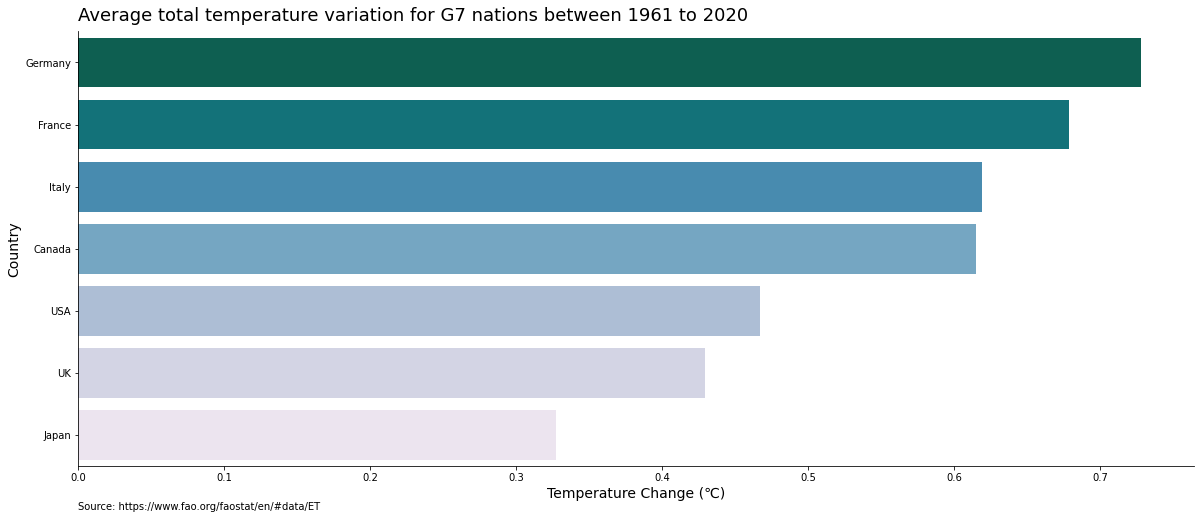

In [16]:
#Restructure data for visualisation
g7_pivot = pd.pivot_table(g7, index = ["Country"], columns=["Year"], values = ["Value"])
g7_pivot["Total variation"] = g7_pivot.mean(axis=1)
g7_pivot.reset_index(inplace = True)

#Construct visualisation 
plt.figure(figsize= (20,8))
sns.barplot(y = "Country", x = "Total variation", data =g7_pivot, palette = "PuBuGn_r", order = g7_pivot.sort_values("Total variation", ascending = False)["Country"])

#Customisation
plt.title("Average total temperature variation for G7 nations between 1961 to 2020", fontsize = 18, loc='left', y = 1.01)


plt.ylabel("Country", fontsize=14)
plt.xlabel("Temperature Change (℃)", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)

## South America 
Replicating the visualisation once more, for South American nations, highlights that the general trend remains the same (i.e. temperatures are increasing). However, unlike the G7, South American countries first report a year on year temperature increase in mid 1985s, approx. a decade before the G7 nations.

In [17]:
South_America = ["Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","French Guyana",
                 "Guyana","Paraguay","Peru","Suriname","Uruguay","Venezuela"]
# https://www.britannica.com/topic/list-of-countries-in-Latin-America-2061416

In [18]:
#Restructure data for visualisation

SA = temp[temp["Country"].isin(["Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","French Guyana",
                 "Guyana","Paraguay","Peru","Suriname","Uruguay","Venezuela"])]

SA = SA.groupby("Year")["Value"].mean().reset_index()

#Construct visualisation 
fig =px.line(SA, x="Year", y= "Value",  title = "Temperature fluctuation for South American between 1961 to 2020 (interactive)")

#Customisation
fig.add_hline(0, line_width = 2, line_dash = "dot")

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')
fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow= False, x= 0, y =-.15, 
                  xref = "paper", yref = "paper", xanchor="left", yanchor="bottom", xshift=-1, yshift=-5,
                  font=dict(size = 10, color = "grey"), 
                  align = "left")

fig.show()

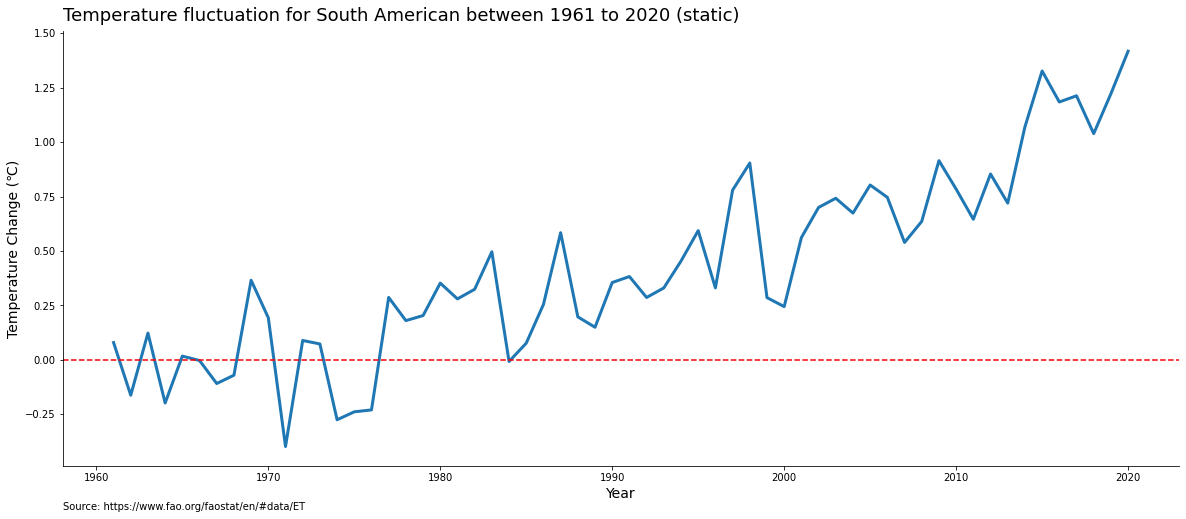

In [19]:
#Construct visualisation 
plt.figure(figsize = (20,8))
sns.lineplot(x = "Year", y = "Value", data = SA, markers = "o", lw = 3)

#Customisation
plt.axhline(0, ls = "--", color = "red")

plt.title("Temperature fluctuation for South American between 1961 to 2020 (static)", fontsize = 18, loc='left', y = 1.01)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)

The breakdown of the data on an individual level mirrors the previous observations made for the G7 - neighbouring countries do not always have the same temperature fluctuations. However, unlike in the case of Canada and the US, where latitude may have caused the temperature fluctuations, some of the South American nations which should have similar latitudes. Therefore there may be other factors affecting temperature fluctuations.

Additionally, whilst 1996 does not appear to have been a particularly cold year for South American, 2000 was a particularly cold year. Moreover, colder yet was the year 2007 where Chile and Argentina reported a negative temperature decrease of approx. -0.4 to -0.3 degrees.

In [20]:
#Restructure data for visualisation
South_America = df_group[df_group['Country'].isin(South_America)]

#Construct visualisation 
fig = px.line(South_America, x="Year", y = "Value", color = "Country",
        title = "Temperature fluctuation for South American countries between 1961 to 2020 (interactive)",)

#Customisation
fig.add_hline(0, line_width = 1, line_dash = "dot")

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.add_annotation(text = ("Source: https://www.fao.org/faostat/en/#data/ET"), showarrow= False, x= 0, y =-.15, 
                  xref = "paper", yref = "paper", xanchor="left", yanchor="bottom", xshift=-1, yshift=-5,
                  font=dict(size = 10, color = "grey"), 
                  align = "left")


#extracting plotly graphs 
#py.plot(fig, filename = "Temperature fluctuation for South American countries between 1961 to 2020 (interactive)", auto_open = False)

fig.show()

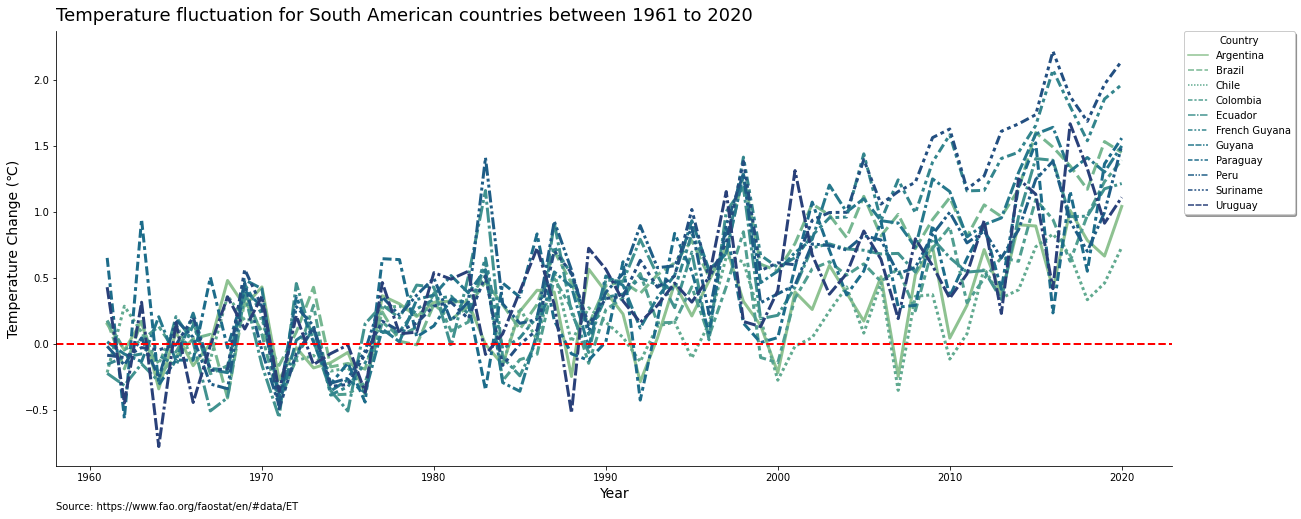

In [21]:
#Construct visualisation 
plt.figure(figsize = (20,8))
sns.lineplot(x="Year", y = "Value", data = South_America, hue = "Country", lw = 3, style = "Country", palette = "crest")

#Customisation
plt.axhline(0, ls = "--", color = "red", lw = 2)

plt.title("Temperature fluctuation for South American countries between 1961 to 2020", fontsize = 18, loc='left', y = 1.01)
plt.legend(title = "Country", bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, shadow = 1)


plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)

The graph highlighting the average temperature fluctuation for the South American nations shows that Suriname had the biggest average temperature fluctuation at 0.6 degrees. Chile had a smaller temperature in comparison with approx. 0.275 degree temperature increase.

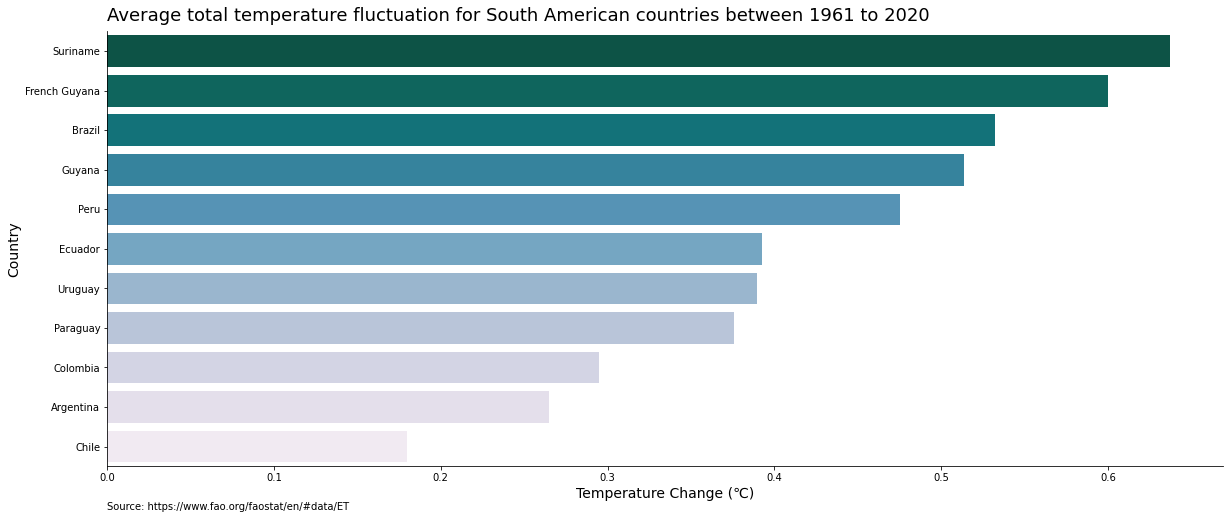

In [22]:
#Restructure data for visualisation
South_America_pivot = pd.pivot_table(South_America, index = ["Country"], columns=["Year"], values = ["Value"])
South_America_pivot["Total variation"] = South_America_pivot.mean(axis=1)
South_America_pivot.reset_index(inplace = True)

#Construct visualisation 
plt.figure(figsize= (20,8))
sns.barplot(y = "Country", x = "Total variation", data =South_America_pivot, 
            palette = "PuBuGn_r", order = South_America_pivot.sort_values("Total variation", ascending = False)["Country"])

#Customisation
plt.ylabel("Country", fontsize=14)
plt.xlabel("Temperature Change (℃)", fontsize=14)

plt.title("Average total temperature fluctuation for South American countries between 1961 to 2020", 
          fontsize = 18, loc='left', y = 1.01)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)

It should be noted that Chile is the only nation in South America where the standard deviation of the temperature includes values clearly below 0. Once again further research would be required to understand the causes of Chile’s temperature decreases.

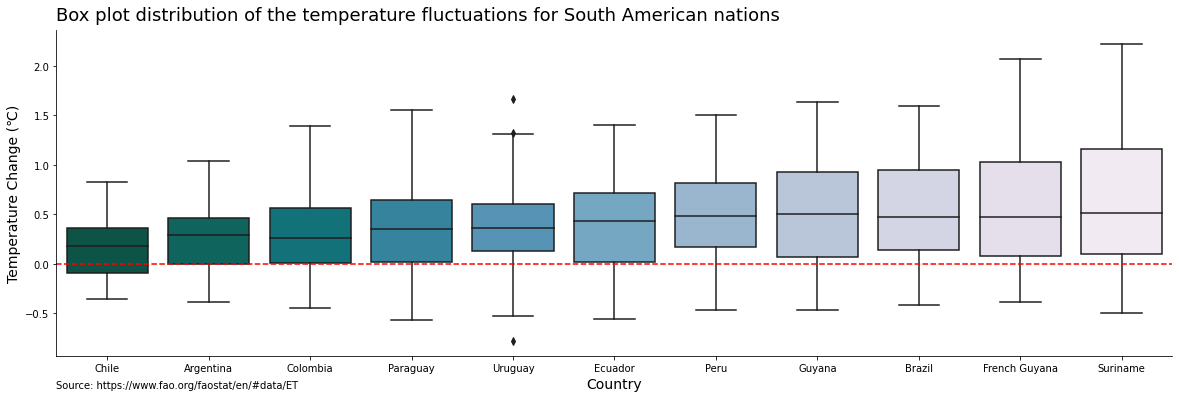

In [23]:
#Construct visualisation 
plt.figure(figsize= (20,6))
sns.boxplot(x = "Country", y = "Value", data = South_America, palette = "PuBuGn_r", 
            order = South_America_pivot.sort_values("Total variation", ascending = True)["Country"])

#Customisation
plt.axhline(0, ls = "--", color = "red")
plt.xlabel("Country", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)

plt.title("Box plot distribution of the temperature fluctuations for South American nations", fontsize = 18, loc='left', y = 1.01)
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )

sns.despine(top = True, right = True, left = False, bottom = False)

# World temperature changes
The final section demonstrates the temperature fluctuations on a global scale.


The first graph shows the average temperature of each nation across the time period. This reveals that some of the East European countries such as Belarus, Lithuania and Latvia had the highest average temperature increases. Colder regions such as Russia and Antarctica had the lowest temperature increases. Chile, once again, has a noticeably low average temperature increase. One aspect of interest may be to investigate how coastlines compared to land mass affects the temperatures recorded in the nation. For example, does the proximity to water lead to a decrease in temperatures?

In [24]:
df_pivot = pd.pivot_table(df_group, index = ["Country"], columns=["Year"], values = ["Value"])
df_pivot["Total variation"] = df_pivot.mean(axis=1)
df_pivot.reset_index(inplace = True)


data = dict(
        type = 'choropleth',
        colorscale = 'temps',
        reversescale = False,
        locations = df_pivot["Country"],
        locationmode = "country names",
        z = df_pivot['Total variation'],
        text = df_pivot["Country"],
        colorbar = {'title' : 'Total variation'},
      ) 

layout = dict(title = 'Choromap of average temperature for countries between 1961 to 2020', geo = dict(showframe = False, projection = {'type':'mercator'})
             )

In [25]:
choromap = go.Figure(data = [data],layout = layout)
choromap.update_layout(height = 650, width = 1000)
choromap


The final graph is an animation which shows how over time globally the temperatures increased starting from the dark pink where the temperatures were low and gradually increasing and the graph starts to appear more and more light pink/yellow. This is aimed to further emphasize the temperature increase.

In [26]:
df = px.data.gapminder()
fig = px.choropleth(df_group , locations = df_group["Country"], locationmode = "country names", 
                    color="Value", hover_name="Value", animation_frame="Year",
                    range_color=[-4,5], title = "Animated graph of global temperature fluctuations between 1961 to 2020", color_continuous_scale = 'magma', height = 500, width = 1000)
fig.show()

# Conclusion
Examining the global temperatures for years 1961 and 2020, it is clear that the global temperatures for all countries are increasing. Nations have reported varying degrees of temperature increases throughout this period. This may be the cause of the emphasis placed upon global warming gaining traction post 1990s as nations could no longer argue with the global trend of rising temperatures. Currently it is unclear if the trend can be revised but with regulations tacking global warming have been increasingly introduced, governments are acknowledging the concerns.

Further research is needed to understand some of the causes such as why some nations and years have noted a drop in temperatures and acts against the overall trend.

# Appendix 
As alluded in the body of the project, the appendix is divided into two sections. The first is a review of the individual elements of the dataset which were taken as granted. The second is some additional resources for those who wish to review a specific nation and its temperature fluctuation. 

## Understanding the dataset
This section is an overview of the data and explains some of the assumptions made throughout the project. Firstly, the temperature dataset consists of over 67000 dataset with some null values in the value column. These are data points where in variable “Flag description” it is listed as “Data Not Available”. As the “Value” column is central to this project, these null values are excluded from this project. This change will lead to a reduction in the size of the dataset by 3.4%.

In [27]:
data = pd.read_csv("/kaggle/input/z-unlocked-challenge-1-data-visualization/temperature_change_data_11-29-2021.csv")
data.columns

Index(['Domain Code', 'Domain', 'Area Code (ISO3)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67625 entries, 0 to 67624
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       67625 non-null  object 
 1   Domain            67625 non-null  object 
 2   Area Code (ISO3)  67625 non-null  object 
 3   Area              67625 non-null  object 
 4   Element Code      67625 non-null  int64  
 5   Element           67625 non-null  object 
 6   Months Code       67625 non-null  int64  
 7   Months            67625 non-null  object 
 8   Year Code         67625 non-null  int64  
 9   Year              67625 non-null  int64  
 10  Unit              67625 non-null  object 
 11  Value             65331 non-null  float64
 12  Flag              67625 non-null  object 
 13  Flag Description  67625 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 7.2+ MB


In [29]:
data[data["Value"].isnull()].head()

Domain Code              Domain Area Code (ISO3)            Area  \
937           ET  Temperature change              ASM  American Samoa   
949           ET  Temperature change              ASM  American Samoa   
996           ET  Temperature change              ASM  American Samoa   
997           ET  Temperature change              ASM  American Samoa   
1056          ET  Temperature change              ASM  American Samoa   

      Element Code             Element  Months Code       Months  Year Code  \
937           7271  Temperature change         7016  Dec–Jan–Feb       1998   
949           7271  Temperature change         7016  Dec–Jan–Feb       2010   
996           7271  Temperature change         7017  Mar–Apr–May       1997   
997           7271  Temperature change         7017  Mar–Apr–May       1998   
1056          7271  Temperature change         7018  Jun–Jul–Aug       1997   

      Year Unit  Value Flag    Flag Description  
937   1998   °C    NaN   NV  Data not available  
949   2010   °C    NaN   NV  Data not available  
996   1997   °C    NaN   NV  Data not available  
997   1998   °C    NaN   NV  Data not available  
1056  1997   °C    NaN   NV  Data not available

In [30]:
x = ((data["Value"].isnull().sum()/len(data))*100).round(1)

print ("Approx", x, "% of data in the Value variable are null values.")

Approx 3.4 % of data in the Value variable are null values.


In [31]:
data.drop(data[data["Value"].isnull()].index, axis = 0, inplace = True)

As alterations to other variables are likely to impact the Values variable, other variables will be examined prior to further reviews of the Values variable.

### Time variables 
The metadata for this dataset outlines that the dataset utilises three different methods of calculating a certain period, from specific seasons to meteorological year covering a 12 month period. 

These categories are likely to cause variations in the overall “Value” and therefore the dataset should be split and observed separately. Differing Months could be used to examine seasonal temperature fluctuations. However, for the purpose of this project, Meteorological year may be the best to examine annual temperature fluctuations.

In [32]:
data["Months"].value_counts()

Dec–Jan–Feb            13080
Mar–Apr–May            13077
Jun–Jul–Aug            13069
Sep–Oct–Nov            13061
Meteorological year    13044
Name: Months, dtype: int64

In [33]:
data = data[data["Months"]=="Meteorological year"]

In [34]:
df_group = data.groupby(["Area", "Year"])["Value"].mean().reset_index()

print ("Oldest entry - ", df_group["Year"].min())

Oldest entry -  1961


In [35]:
print ("Newest entry - ", df_group["Year"].max())

Newest entry -  2020


In [36]:
x = df_group["Year"].to_numpy()
print ( "The dataset contains records for", np.ptp(x), "years, starting from", df_group["Year"].min(), "to", df_group["Year"].max())

The dataset contains records for 59 years, starting from 1961 to 2020


In [37]:
x = (df_group["Year"].max() +1) - df_group["Year"].min() == df_group["Year"].nunique()

print( "Are there Values for for every year between 1961 and 2020?", x)

Are there Values for for every year between 1961 and 2020? True


### Area

In [38]:
data["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, mainland', 'China, Taiwan Province of',
       'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslov

The Area variable holds a list of country names. It should be noted that entries such as "Saint Kitts and Nevis" though may appear to refer to a region are in fact one country as classified by the [UN](https://www.un.org/en/about-us/member-states/saint-kitts-and-nevis).

For added readability, the term “Country” has been used for added clarification. In majority of the cases this term holds true under the below [definition of country](https://www.mapsofworld.com/answers/k-12-resources/nation-and-country/#:~:text=In%20broad%20terms%2C%20a%20country,identity%2C%20ethnicity%2C%20history%20etc):
> “In broad terms, a country is a group of people governed by a government, which is the final authority over those people. There is a political setup that governs everyone in the country.”

There is, however, a possibility that some entries may be [territories](http://www.differencebetween.net/miscellaneous/politics/political-institutions/difference-between-territory-and-state/#:~:text=A%20state%20is%20also%20sometimes,the%20state%20that%20governs%20them).

In [39]:
data.rename(columns = {"Area": "Country"}, inplace = True)

It should be noted that names of countries and territories are subject to change over time. The most clear representation of this is the inclusion of “USSR” which was dissolved in 1991 to current day Russia and other nations [(Office of the Historian, 2021)](https://history.state.gov/milestones/1989-1992/collapse-soviet-union#:~:text=On%20December%2025%2C%201991%2C%20the,the%20newly%20independent%20Russian%20state). This is likely to impact the dataset as countries which ceased to exist or came into existence during the years of 1961 and 2020 are likely to have less data points than established nations.

The impact of this is further highlighted in the observation that some nations such as Sudan and South Sudan have only 10 data points whilst other nations can have as much as 60 data points.

In [40]:
x = data[data["Country"]== "USSR"]["Year"].max()
print ("Most recent record for USSR is", x)

Most recent record for USSR is 1991


In [41]:
data["Country"].value_counts()

Afghanistan              60
Mali                     60
Martinique               60
Mauritania               60
Mauritius                60
                         ..
Montenegro               15
Serbia                   15
Serbia and Montenegro    14
Sudan                    10
South Sudan              10
Name: Country, Length: 247, dtype: int64

Additionally, this can be viewed graphically in the image below. The key point of note is that as the data for Serbia and Montenegro disappear from 2005, individual data points for Serbia and Montenegro begin to appear in 2006. Furthermore, additional research indicates that within this dataset the same region is also referred to as [Yugoslav SFR](https://www.nationsonline.org/oneworld/serbia_montenegro.htm). Similar histories apply for Sudan and South Sudan [(BBC, 2018)](https://www.bbc.co.uk/news/world-africa-14069082#:~:text=South%20Sudan%20gained%20independence%20from,most%20diverse%20countries%20in%20Africa).

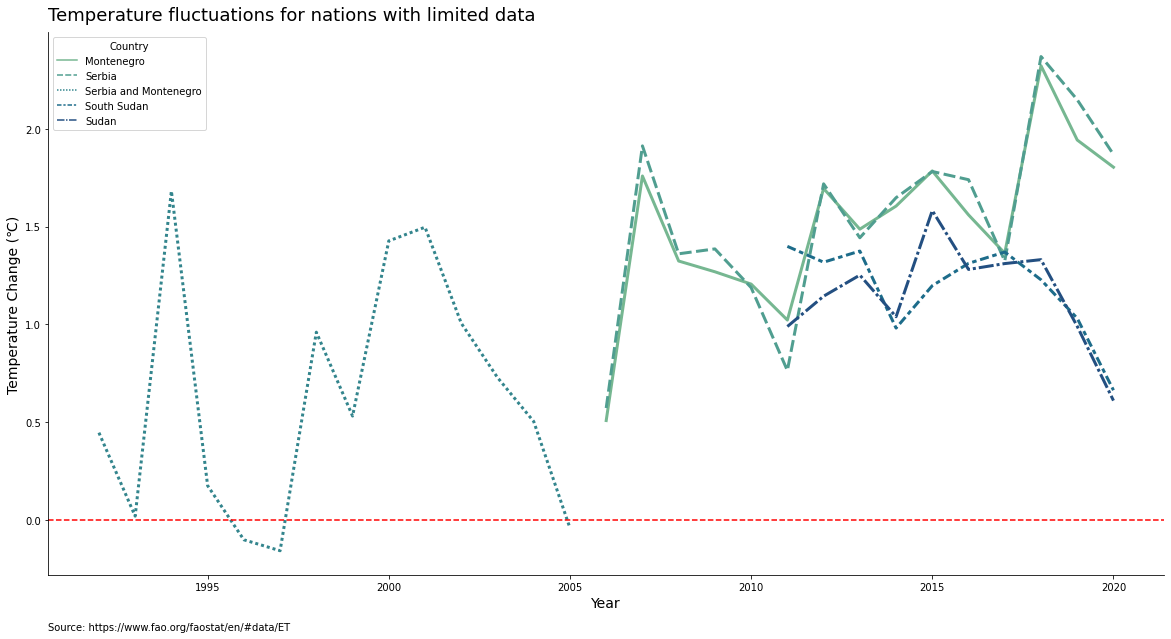

In [42]:
#Restructure data for visualisation
limited_values = data["Area Code (ISO3)"].value_counts().tail().rename_axis('Country').reset_index(name='counts')
limited_values = data[data['Area Code (ISO3)'].isin(limited_values["Country"])]

#Construct visualisation 
plt.figure(figsize =(20,10))
sns.lineplot(data = limited_values, x="Year", y = "Value", hue = "Country", palette = "crest",style = "Country", lw= 3)

#Customisation
plt.title("Temperature fluctuations for nations with limited data", fontsize = 18, loc='left', y = 1.01)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)

plt.axhline(0, ls = "--", color = "red")
plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)

### Value 
Reverting back to the “Value” variable, further observations can now be made. The previous alterations have reduced the dataset to 13044 entries. The biggest decrease in the temperature is approx. -3 and the highest increase was over 5 degrees. 

The average increase in the temperature is approx. 0.5 degrees. For those interested, removing the filter for Month led to max and min values as approx. -6 and max of 8 degrees.

In [43]:
data["Value"].describe()

count    13044.000000
mean         0.491651
std          0.649765
min         -3.251000
25%          0.032000
50%          0.415500
75%          0.882000
max          5.328000
Name: Value, dtype: float64

The data also has a slight positive skew as the extremely high positive distorts the graph to the right. Furthermore the average lies above 0, indicating that on average the temperatures have been increasing. It may be also worth noting that the initial observation of the dataset appears to show some outliers in the data for values +/- 2 degrees.

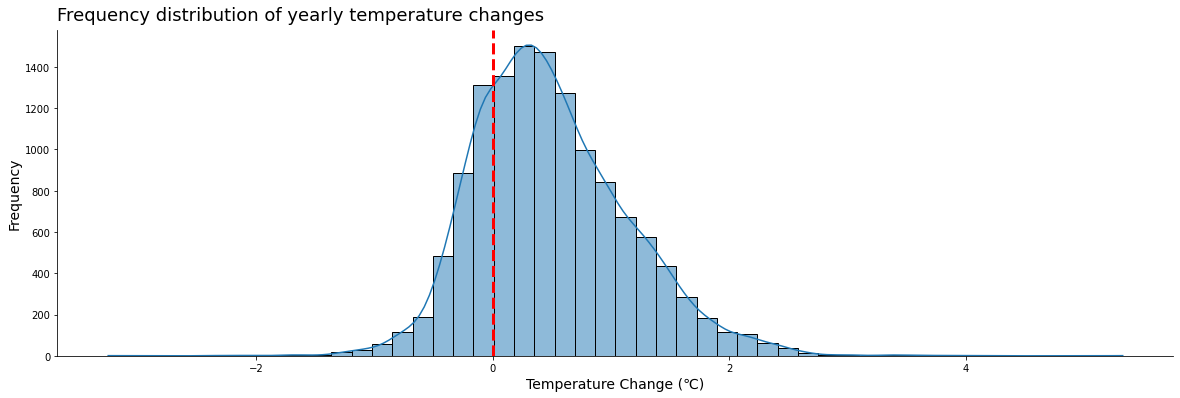

In [44]:
#Construct visualisation 
plt.figure(figsize = (20,6)) 
fig = sns.histplot(x = "Value", data = data, kde= True, bins = 50,)

#Customisation
plt.title("Frequency distribution of yearly temperature changes", fontsize = 18, loc='left', y = 1.01)
plt.axvline(0, ls = "--", color = "red", lw= 3)

plt.xlabel("Temperature Change (℃)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
sns.despine(top = True, right = True, left = False, bottom = False)

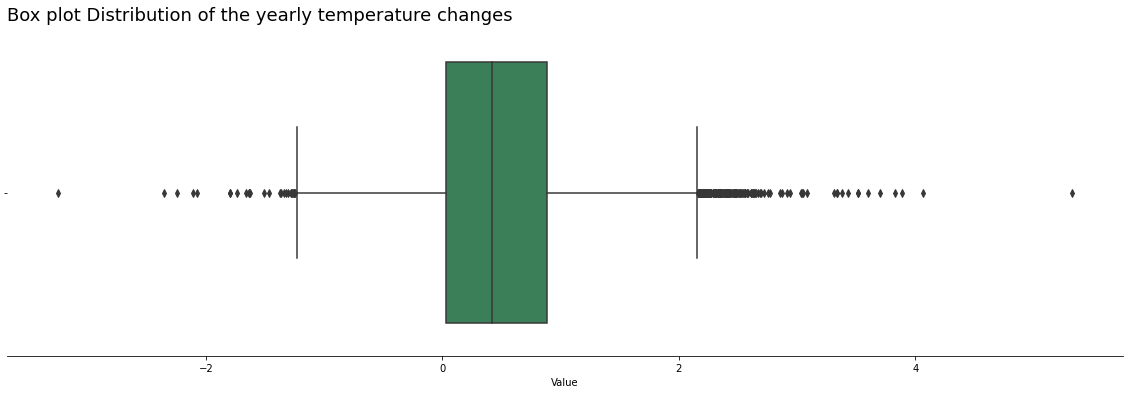

In [45]:
#Construct visualisation 
plt.figure(figsize = (20,6)) 
sns.boxplot(x = "Value", data = data, color = "seagreen")

#Customisation
plt.title("Box plot Distribution of the yearly temperature changes", fontsize = 18, loc='left', y = 1.01)
sns.despine(top = True, right = True, left = True, bottom = False)

### Other variables
Finally, although the data in the remaining columns are relatively straight forward, they should not be ignored. Dropping the null values in the “Value” column has led to the flag variable now containing only one variable, “Calculated data”.

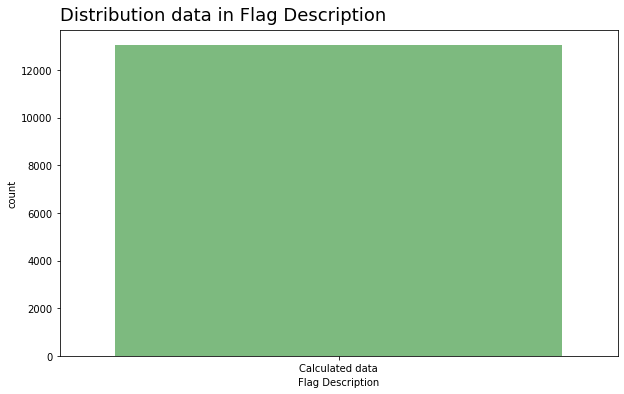

In [46]:
#Construct visualisation 
plt.figure(figsize=(10,6))
sns.countplot(x = "Flag Description", data= data, palette = "Greens")

#Customisation
plt.title("Distribution data in Flag Description", fontsize = 18, loc='left', y = 1.01)

plt.show()

Moreover, variables such as Unit matches those listed in the metadata information.

In [47]:
data["Unit"].unique()

array(['°C'], dtype=object)

## Global temperature fluctuations for all nations 
Below is an interactive graph highlighting how the temperatures for each nation have changed overtime. This graph is for anyone who is interested in examining data points which may not have been reviewed in this project.

In [48]:
#Restructure data for visualisation
df_group = data.groupby(["Country", "Year"])["Value"].mean().reset_index()

#Construct visualisation 
fig = px.line(df_group, x="Year", y = "Value", color = "Country", height = 600, width = 1000, title = "Global temperature fluctuation of countries between 1961 to 2020")

#Customisation
fig.add_hline(0, line_width = 2, line_dash = "dot")
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(showline=True, linewidth=1, linecolor='black')

fig.show()

On a static graph, it is clear that there is a gradual increase in temperatures and the majority of the nations follow a similar trend.

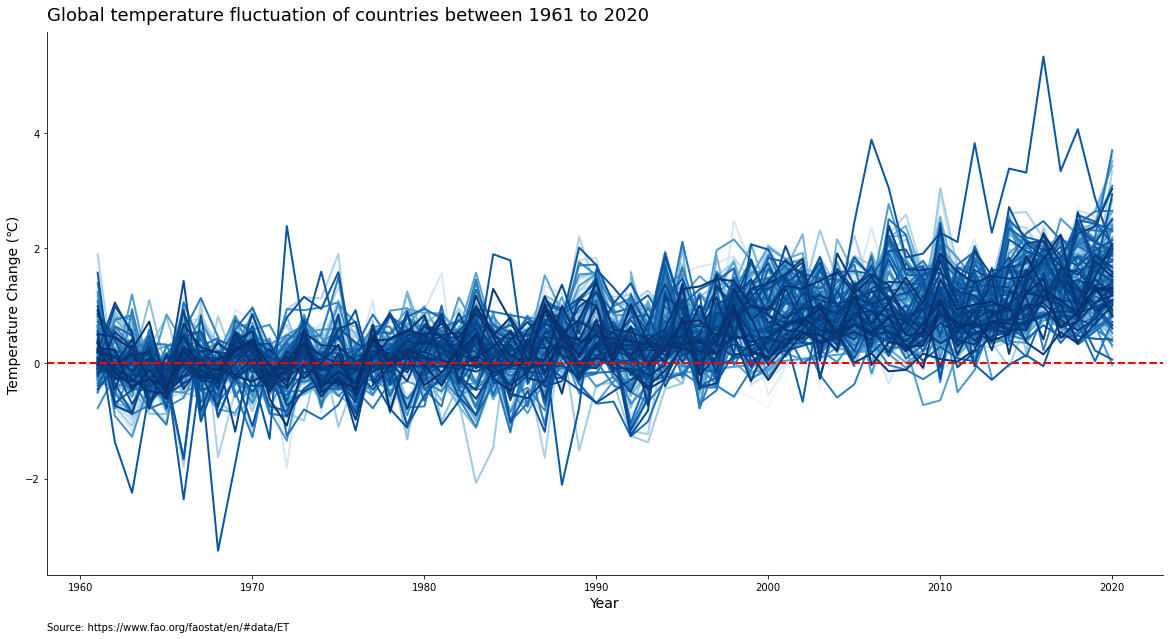

In [49]:
#Construct visualisation 
plt.figure(figsize = (20,10))
fig = sns.lineplot( x="Year", y = "Value", data = df_group, hue = "Country", palette = "Blues", lw =2) 

#Customisation
plt.title("Global temperature fluctuation of countries between 1961 to 2020", fontsize = 18, loc='left', y = 1.01)

plt.axhline(0, ls = "--", color = "red", lw =2)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Temperature Change (℃)", fontsize=14)
fig.get_legend().remove()

plt.annotate('Source: https://www.fao.org/faostat/en/#data/ET', (0,-.1), xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)

# Works Cited
Below are some of the particular key resources used in this project.

    Jee, Ken, and Andrara Olteanu. “Challenge 1 Tutorial - Line Chart (Seaborn).” Kaggle, 2022, Challenge 1 Tutorial - Line Chart (Seaborn). Accessed 7 March 2022.

    Knaflic, Cole Nussbaumer. Storytelling with Data: A Data Visualization Guide for Business Professionals. Wiley, 2015.


# Disclaimer
This is a data visualisation project conducted as part of [HP’s unlocked challenge one](https://www.hp.com/us-en/workstations/industries/data-science/unlocked-challenge.html)